# Energie et environment en Belgique

Le dataset est tiré d'un site web gouvernemental:: http://ibsa.brussels/themes/environnement-et-energie?set_language=fr#.XHfBHuhKhXw 

Les données rassemblées ici portent sur le climat, la qualité de l’air, la consommation et la qualité de l’eau, les collectes de déchets, les espaces verts, la biodiversité, la consommation énergétique, etc.

In [153]:
import pandas as pd 
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt
FIGSIZE = (16.0, 8.0)
plt.rcParams['figure.figsize'] = (12.0, 5.0)

pd.options.display.max_rows = 55
pd.options.display.max_colwidth = 500

In [154]:
link1 = '12.1_environnement_energie_environnement_territoire_20180220.xlsx'
link2 = '12.2_environnement_energie_environnement_societe_20180829.xlsx'
link3 = '12.3_environnement_energie_energie_20180829.xlsx'

## Qualité de l'air en Bruxelles-Capitale 2005-2017

- Unités : microgrammes par mètre cube, heures\nÉchelle géographique : station de mesure\nSource : Bruxelles Environnement
- : = Non disponible (mesures non effectuées ou non fiables)
- x : Non existant (nouvelle station de mesure en 2013)
- c : Confidentiel (non communiqué)
- a1 : Valeur limite de 40 µg/m3 en tant que concentration moyenne annuelle à ne pas dépasser (à partir de 2010)
- a2 : Valeur limite de 200 µg/m3 en tant que valeur horaire, à ne pas dépasser plus de 18 fois par an (à partir de 2010)

#### Dataframes

- 1 concentrations en dioxyde d'azote (NO2)
- 2 concentrations en ozone (O3) 
- 3 concentrations en particules en suspension de diamètre inférieur à 10 µm 
- 4 concentrations en particules en suspension de diamètre inférieur à 2,5 µm 

In [155]:
xl = pd.ExcelFile(link1)
#print(xl.sheet_names)

df1 = xl.parse(sheet_name= '12.1.1.2', header=1) #NO2
df2 = xl.parse(sheet_name= '12.1.1.3', header=1) #O3
df3 = xl.parse(sheet_name= '12.1.1.4', header=1) #particles <10µm 
df4 = xl.parse(sheet_name= '12.1.1.5', header=1) #particles <2,5µm 

In [156]:
df1.shape

(49, 14)

In [157]:
df1

,Unnamed: 0,Année,Molenbeek (R001),Ixelles (R002),Ste-Catherine (B004),Eastman-Belliard (B005),Parlement européen (B006),Belliard Remard (B008),Berchem-Ste-Agathe (B011),Uccle (R012),Haren (N043),Parc Meudon (MEU1),Woluwe St-Lambert (WOL1),Forest (E013)
0,Concentration moyenne annuelle (µg/m3),2005.0,47.000000,58.000000,43,40,38,:x,32.000000,27.000000,46.000000,32,44.000000,34
1,Part des jours > 40 µg/m3 (%)a1,2005.0,63.300000,81.100000,47.4,44.7,40.5,:x,24.100000,15.100000,61.100000,27.9,49.000000,29.9
2,Nombre d'heures > 200 µg/m3 (heures)a2,2005.0,0.000000,0.000000,1,0,0,:x,0.000000,0.000000,0.000000,0,0.000000,0
3,Concentration moyenne annuelle (µg/m3),2006.0,47.000000,54.000000,:,39,38,:x,29.000000,30.000000,45.000000,31,46.000000,32
4,Part des jours > 40 µg/m3 (%)a1,2006.0,58.600000,77.800000,:,41.9,38.1,:x,18.400000,17.500000,53.700000,23.3,56.400000,20.3
5,Nombre d'heures > 200 µg/m3 (heures)a2,2006.0,0.000000,1.000000,:,0,0,:x,0.000000,0.000000,0.000000,0,2.000000,0
6,Concentration moyenne annuelle (µg/m3),2007.0,46.000000,54.000000,:,43,40,:x,31.000000,29.000000,45.000000,32,46.000000,29
7,Part des jours > 40 µg/m3 (%)a1,2007.0,57.534247,74.520548,:,47.1233,41.0959,:x,25.479452,21.369863,50.684931,21.3699,53.972603,13.4
8,Nombre d'heures > 200 µg/m3 (heures)a2,2007.0,1.000000,8.000000,:,3,0,:x,1.000000,0.000000,1.000000,1,7.000000,0
9,Concentration moyenne annuelle (µg/m3),2008.0,44.000000,54.000000,41,37,38,:x,28.000000,27.000000,46.000000,35,42.000000,:


In [158]:
df1 = df1.drop(list(range(39,49)), axis=0)

In [159]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 14 columns):
Unnamed: 0                   39 non-null object
Année                        39 non-null float64
Molenbeek (R001)             39 non-null float64
Ixelles
(R002)               39 non-null float64
Ste-Catherine (B004)         39 non-null object
Eastman-Belliard (B005)      39 non-null object
Parlement européen (B006)    39 non-null object
Belliard Remard (B008)       39 non-null object
Berchem-Ste-Agathe (B011)    39 non-null float64
Uccle
(R012)                 39 non-null float64
Haren
(N043)                 39 non-null float64
Parc Meudon (MEU1)           39 non-null object
Woluwe 
St-Lambert (WOL1)    39 non-null float64
Forest
(E013)                39 non-null object
dtypes: float64(7), object(7)
memory usage: 4.6+ KB


In [160]:
x = {":":0, ":x":0, ":c":0}

In [161]:
df1["Ste-Catherine (B004)"] = df1["Ste-Catherine (B004)"].replace(x)
df1["Ste-Catherine (B004)"] = df1["Ste-Catherine (B004)"].astype('float')

In [162]:
df1["Eastman-Belliard (B005)"] = df1["Eastman-Belliard (B005)"].replace(x)
df1["Eastman-Belliard (B005)"] = df1["Eastman-Belliard (B005)"].astype('float')

In [163]:
df1["Parlement européen (B006)"] = df1["Parlement européen (B006)"].replace(x)
df1["Parlement européen (B006)"] = df1["Parlement européen (B006)"].astype('float')

In [164]:
df1["Belliard Remard (B008)"] = df1["Belliard Remard (B008)"].replace(x)
df1["Belliard Remard (B008)"] = df1["Belliard Remard (B008)"].astype('float')

In [165]:
df1["Parc Meudon (MEU1)"] = df1["Parc Meudon (MEU1)"].replace(x)
df1["Parc Meudon (MEU1)"] = df1["Parc Meudon (MEU1)"].astype('float')

In [166]:
df1 = df1.rename(columns={"Forest\n(E013)":"Forest (E013)", "Unnamed: 0":"index"})

In [167]:
df1["Forest (E013)"] = df1["Forest (E013)"].replace(x)
df1["Forest (E013)"] = df1["Forest (E013)"].astype('float')

In [168]:
#df1 = df1.set_index("index")

In [169]:
df1.sample(5)

,index,Année,Molenbeek (R001),Ixelles (R002),Ste-Catherine (B004),Eastman-Belliard (B005),Parlement européen (B006),Belliard Remard (B008),Berchem-Ste-Agathe (B011),Uccle (R012),Haren (N043),Parc Meudon (MEU1),Woluwe St-Lambert (WOL1),Forest (E013)
17,Nombre d'heures > 200 µg/m3 (heures)a2,2010.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12,Concentration moyenne annuelle (µg/m3),2009.0,43.0,51.0,42.0,38.0,38.0,0.0,28.0,28.0,47.0,34.0,39.0,0.0
13,Part des jours > 40 µg/m3 (%)a1,2009.0,47.1,71.8,50.1,34.0,40.3,0.0,19.2,17.8,57.3,28.5,36.2,0.0
37,Part des jours > 40 µg/m3 (%)a1,2017.0,28.0,67.0,32.0,0.0,0.0,0.0,10.0,6.0,42.0,15.0,32.0,0.0
28,Part des jours > 40 µg/m3 (%)a1,2014.0,40.0,63.0,28.0,0.0,19.0,83.0,8.0,7.0,50.0,13.0,42.0,0.0


In [170]:
df1.columns[2:]

Index(['Molenbeek (R001)', 'Ixelles\n(R002)', 'Ste-Catherine (B004)',
       'Eastman-Belliard (B005)', 'Parlement européen (B006)',
       'Belliard Remard (B008)', 'Berchem-Ste-Agathe (B011)', 'Uccle\n(R012)',
       'Haren\n(N043)', 'Parc Meudon (MEU1)', 'Woluwe \nSt-Lambert (WOL1)',
       'Forest (E013)'],
      dtype='object')

In [171]:
data = df1.melt(id_vars=["index", "Année"], var_name="location", value_name="concentration")

In [172]:
data.head()

,index,Année,location,concentration
0,Concentration moyenne annuelle (µg/m3),2005.0,Molenbeek (R001),47.0
1,Part des jours > 40 µg/m3 (%)a1,2005.0,Molenbeek (R001),63.3
2,Nombre d'heures > 200 µg/m3 (heures)a2,2005.0,Molenbeek (R001),0.0
3,Concentration moyenne annuelle (µg/m3),2006.0,Molenbeek (R001),47.0
4,Part des jours > 40 µg/m3 (%)a1,2006.0,Molenbeek (R001),58.6


In [173]:
pd.crosstab(data["index"], data["Année"])

Année,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
index,,,,,,,,,,,,,
Concentration moyenne annuelle (µg/m3),12,12,12,12,12,12,12,12,12,12,12,12,12
Nombre d'heures > 200 µg/m3 (heures)a2,12,12,12,12,12,12,12,12,12,12,12,12,12
Part des jours > 40 µg/m3 (%)a1,12,12,12,12,12,12,12,12,12,12,12,12,12


In [174]:
table = data.groupby(["index", "location", "Année"])["concentration"].sum()
table

index                                   location                    Année 
Concentration moyenne annuelle (µg/m3)  Belliard Remard (B008)      2005.0     0.000000
                                                                    2006.0     0.000000
                                                                    2007.0     0.000000
                                                                    2008.0     0.000000
                                                                    2009.0     0.000000
                                                                    2010.0     0.000000
                                                                    2011.0     0.000000
                                                                    2012.0     0.000000
                                                                    2013.0    63.000000
                                                                    2014.0    61.000000
                                             

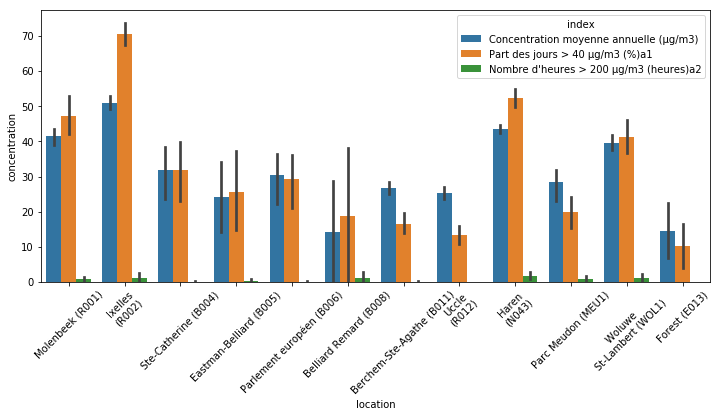

In [195]:
g = sns.barplot(x="location", y="concentration", data=data, hue="index")
for item in g.get_xticklabels():
    item.set_rotation(45)

In [ ]:
#df1['Belliard Remard (B008)']
df1['Année'].unique()

### Manipulation de données

Pour tracer les différentes mesures de concentration en fonction de l'année, nous aurons besoin des concentrations en colonnes et des emplacements en lignes. 

you want the columns to be the concentrations of NO

locations as rows

In [ ]:
df1 = df1.reset_index()

In [ ]:
df1 = df1.iloc[:39]

In [ ]:
#df1.rename(columns={'index':'measure'}, inplace=True)

In [ ]:
df1.info()

In [ ]:
data = df1.melt(id_vars=['index', 'Année'], 
               value_vars= df1.columns[2:], 
               var_name='location', 
               value_name='concentration').pivot_table(index=['location', 'Année'], 
                                                       columns=['index'], 
                                                       aggfunc=lambda x:x)

data.head()


Je ne comprends pas pourquoi si je fais un melt et puis le pivot_table cela ne fonctionne pas. Erreur: type(data)= NonType

In [ ]:
data.info()

In [ ]:
data.columns = data.columns.droplevel()
data = data.reset_index()
data.head()

In [ ]:
data.info()

 ### Nettoyage des données
Nous devons supprimer les valeurs qui sont NaN et transformer les mesures de concentration en valeurs numériques.

In [ ]:
#I preferred to use replace than to_numeric 

#observing the unique names of the missing values
data.columns[data.isna().sum()!=0]

data = data[2:].replace([':', ':c', ':x'], 0)

In [ ]:
data.head()

In [ ]:
data.info()

## Visualisation

In [ ]:
sns.lmplot(data=data, x='Année', y="Concentration moyenne annuelle (µg/m3)", hue='location', fit_reg=False)



## Rapport

- Belliard Remard présente les valeurs de pollution les plus élevées, dépassant 60 µg / m3 de NO2. C'est intéressant que les données des deux dernières années ont été qualifiées comme confidentielles.
- Ixelles se trouve dans la deuxième position de pollution, avec des niveaux compris entre 50 et 60 µg / m3 de NO2.
- La plupart des location ont une concentration entre trente et cinquante µg / m3 de NO2.
- Uccle est l'endroit le plus propre de Bruxelles, avec des niveaux compris entre entre vingt et trente µg / m3 de NO2, et Berchem-Ste. Agathe est la deuxième plus propre.

Pour mieux voir les tendances, faisons une visualisation supplémentaire.

### Une autre méthode pour manipuler les données

Nous découpons des données en morceaux, chacun en fonction de la mesure de la concentration.

In [ ]:
decir = df1[df1['index'] == 'Concentration moyenne annuelle (µg/m3)']

decir.shape

In [ ]:
decir.info()

In [ ]:
decir = decir[2:].replace([':', ':c', ':x'], 0)

decir.shape

Nous avons perdu deux lignes. Des valeurs nulles pourraient être imputé pars la médiane.

### Tendances

In [ ]:
 list = ['Molenbeek (R001)', 'Ixelles\n(R002)',
       'Ste-Catherine (B004)', 'Eastman-Belliard (B005)',
       'Parlement européen (B006)', 'Belliard Remard (B008)',
       'Berchem-Ste-Agathe (B011)', 'Uccle\n(R012)', 'Haren\n(N043)',
       'Parc Meudon (MEU1)', 'Woluwe \nSt-Lambert (WOL1)', 'Forest\n(E013)']

for y in list: 
    sns.lmplot(data=decir, x="Année", y=y, fit_reg=True)

La pollution à Molenbeek, Ucle et Berchem-Ste-Agathe a diminué de façon linéaire au cours des douze années de mesure, de 2005 à 2017, en fonction des niveaux de concentration de NO2.

In [ ]:
#Trial coding

no2 = df1.T
no2.columns= no2.iloc[0]
no2.columns.unique()
 no2.reset_index()